<a href="https://colab.research.google.com/github/AlexBoving/hands-on-scikit-learn/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

In linear models, the target value is expected to be a linear combination of the features. In mathematical notation, if $\hat{y}$ is the predicted value:

$$
\hat{y}(w, x) = w_0 + w_1 x_1 + \dots + w_p x_p
$$

where the vector $w = (w_1, \dots, w_p)$ represents the coefficients and $w_0$ the intercept.


In [37]:
# Data manipulation
import pandas as pd

# Array manipulation
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# Model processing
from sklearn import linear_model

# Metrics evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Making statistical plots in python
import seaborn as sns

## Linear Regression (Real Estate Data)

We will be using a small dataset containing the data for the real estate market and will try to predict the value of houses (represented by house price of unit area) using the distance from the nearest MRT station.

In [38]:
# Data upload
url = 'https://raw.githubusercontent.com/AlexBoving/hands-on-scikit-learn/refs/heads/main/RealEstate-Advanced.csv'
df = pd.read_csv(url)

In [39]:
# Returns the 5 first observations of the data.
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [40]:
# Returns a statistical description of the data.
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


We define a helper function in order to plot the original data against the data generated by the model

In [41]:
# Plot the original data against the data generated by the model
def plot_scatter(x,y,xp,yp,title="",xlabel="",ylabel="",xrange=None):
  """Plots the original data (x,y) and a set of point (xp,yp) showing the model approximation"""
  font = {'family': 'sans', 'size': 12}
  plt.rc('font', **font)
  plt.scatter(x, y, color='blue')
  plt.plot(xp, yp, color='red', linewidth=3)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if xrange is not None:
    plt.xlim(xrange) # Sets the limit of the x-axis.
  plt.title(title)
  plt.show()

## Simple Linear Regression
We start with a very basic model using one input variable $x$ and fits the data using the model $y = w_0 + w_1x$. For example, we can use variable "distance to the nearest MRT station" as input to predict the target variable "house price of unit area".

First, we create the matrix X of inputs and the target vector y.

In [44]:
# It transforms the column values into a numpy 1D array. Reshape method transforms the 1D array into a 2D array (vector).
y = df["Y house price of unit area"].values
X = df["X3 distance to the nearest MRT station"].values.reshape(-1,1) # -1 infers the number of columns of 1D vector in the number of rows of the 2D array.

ylabel = "House price of unit area"
xlabel = "Distance to the nearest MRT station"

xrange = [0, X.max().round(-1)+100] # -1 means to round to the nearest 10.
yrange = [y.min().round(-1), y.max().round(-1)+10]

Next, we create a linear regressor and fit it with the input/output data.

In [45]:
# Uses the least squared formula
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X, y) # Fits the linear data by giving the training data X and the target values.

LinearRegression()

We can now compute the R^2 score and RSS by first computing the predicted output yp.

## What is R² (Coefficient of Determination)?
- **R²** measures the proportion of variance in the dependent variable y that can be explained by the independent variable(s) x in the regression model.
- It ranges from **0 to 1**:
  - \( R² = 0 \): The model does not explain any variability in the data.
  - \( R² = 1 \): The model perfectly explains the variability in the data.
  
### Formula for R²:

$$
R² = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

Where:
- **RSS (Residual Sum of Squares)**: The sum of squared differences between the actual values and predicted values.
- **TSS (Total Sum of Squares)**: The sum of squared differences between the actual values and their mean.

## What is MSS (Model Sum of Squares)?
- **MSS** represents the portion of the total variability $TSS$ that is explained by the regression model.
- It shows how much the predicted values deviate from the mean of the actual values.

### Formula for MSS:

$$
\text{MSS} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$

Where:
- $\hat{y}_i$: Predicted value for the $i$-th observation.
- $\bar{y}$: Mean of the observed data $y$.

## Relationship Between TSS, RSS, and MSS:
The total variability **TSS** can be split into two components:

$$
\text{TSS} = \text{MSS} + \text{RSS}
$$

- **TSS**: Total variability in the data.
- **MSS**: Variability explained by the model.
- **RSS**: Variability not explained by the model error.

Using this relationship, **R²** can also be expressed as:

$$
R² = \frac{\text{MSS}}{\text{TSS}}
$$

## Summary:
- **R²** indicates how well the model explains the variance in the data.
- **MSS** quantifies the portion of variance explained by the model.
- Together, they provide insights into the performance of the regression model.


In [51]:
yp = linear_regressor.predict(X) # Predict the values.

r2 = r2_score(y, yp)
print(f"R^2: {r2:.3f}")

rss = sum((yp-y)*(yp-y))
print(f"RSS: {rss:.3f}")

R^2: 0.454
RSS: 41766.700


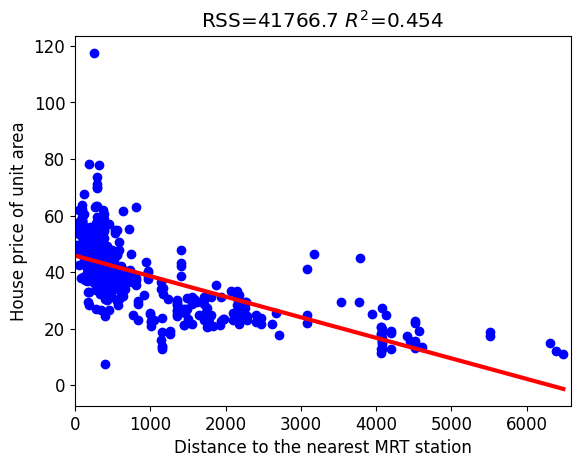

In [52]:
title = "RSS=%.1f $R^2$=%.3f"%(rss,r2)
Xplot = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1) # Return evenly-spaced values with a given interval.
yplot = linear_regressor.predict(Xplot) # We reshape above in order to make it correspond to the input of the model.
plot_scatter(X,y,Xplot,yplot,title,xlabel,ylabel,xrange)

## Residual Plots

RSS and R$^2$ provide an overall evaluation of our model. It is more interesting to explore how our model makes mistakes by analyzing the residuals, that is the difference between the target values and the fitted values. We can analyze the model errors either by plotting (i) the predicted values against the actual values of the target variable and (ii) the predicted values against the residual error. We start by plotting the first option.

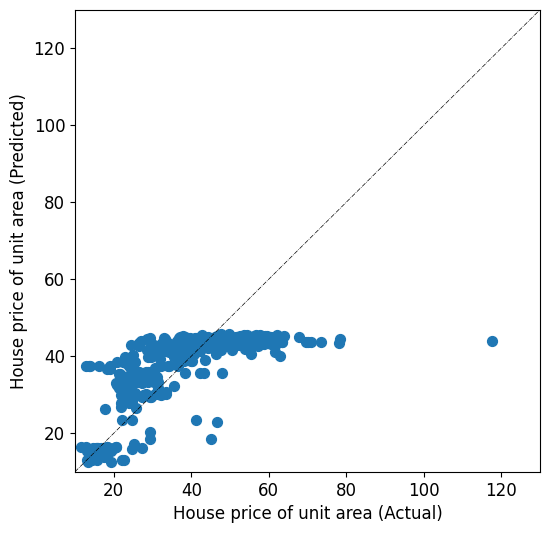

In [53]:
plt.figure(figsize=(6,6))
plt.xlabel(ylabel + " (Actual)")
plt.ylabel(ylabel + " (Predicted)")
plt.plot(yrange,yrange,lw=.5,ls="-.",color='black')
plt.scatter(y, yp, s=50)
plt.xlim(yrange)
plt.ylim(yrange)
plt.show()

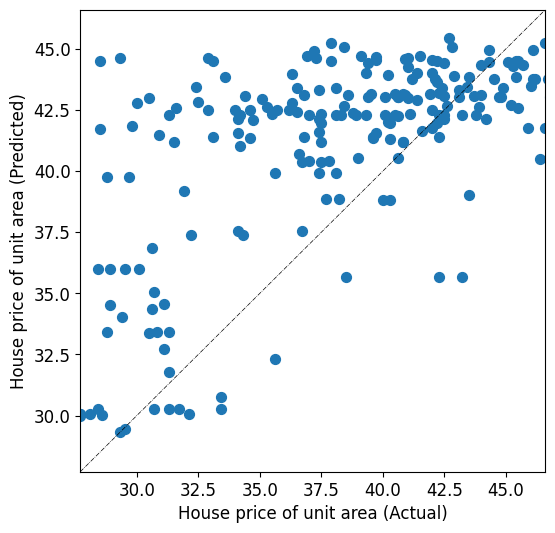

In [54]:
plt.figure(figsize=(6,6))
plt.xlabel(ylabel + " (Actual)")
plt.ylabel(ylabel + " (Predicted)")
plt.plot(yrange,yrange,lw=.5,ls="-.",color='black')
plt.scatter(y, yp, s=50)
plt.xlim([np.quantile(y,.25),np.quantile(y,.75)])
plt.ylim([np.quantile(y,.25),np.quantile(y,.75)])
plt.show()

Next, we compute the residuals and then we plot them.

In [55]:
residuals = y-yp

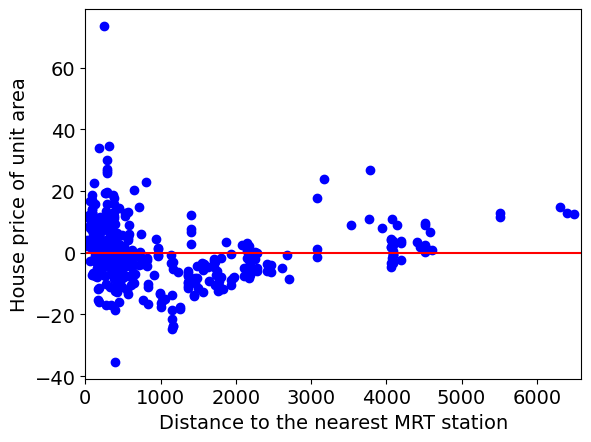

In [56]:
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)
plt.scatter(X, residuals,  color='blue')
plt.plot(xrange,[0,0],'-',c="red")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim(xrange)
plt.show()

The points are not all randomly scattered, showing different variances at different values of the input variable. We can also spot some patterns (for examples, points in a straight line). The plot using z-score normalized residuals is more informative since the values -3 and 3 represents the range containing the 99.7% of the values. -2 and 2 represents the range containing the 95% of the values. Values outside the -3 and 3 can be considered as outliers

In [59]:
# Standardize features by removing the mean and scaling to unit variance. (z-score)
from sklearn.preprocessing import StandardScaler
normalized_residuals = StandardScaler().fit_transform(residuals.reshape(-1,1))

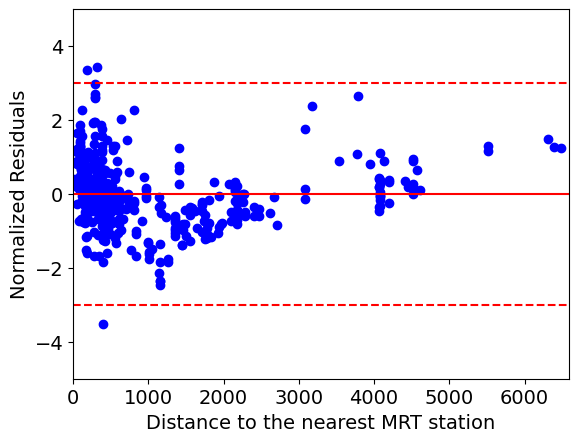

In [58]:
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)
plt.scatter(X, normalized_residuals,  color='blue')
plt.plot(xrange,[0,0],'-',c="red")
plt.plot(xrange,[-3,-3],'--',c="red")
plt.plot(xrange,[3,3],'--',c="red")
plt.xlabel(xlabel)
plt.ylabel("Normalized Residuals")
plt.xlim(xrange)
plt.ylim([-5,5])
plt.show()

# Multiple Linear Regression

We can build a model to predict the target variable using more input variables from the ones available in the data. However, in this example to be able to plot the model using more input variables, we consider polynomial models based on the same input variable.

In [60]:
from sklearn.preprocessing import PolynomialFeatures

Let' start by computing a model using a second degree polynomial. Next, we use linear regression to fit the new input data and the target variable.

In [61]:
polynomial2 = PolynomialFeatures(degree=2, include_bias=False)
X2 = polynomial2.fit_transform(X)

In [62]:
linear_regressor2 = linear_model.LinearRegression()
X2.reshape(-1,2)
linear_regressor2.fit(X2, y);
yp2 = linear_regressor2.predict(X2)

Let's evaluate the model and plot it.

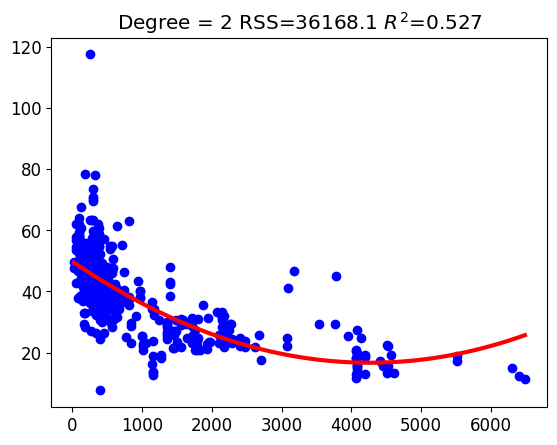

In [63]:
r2_p2 = r2_score(y,yp2)
rss_p2 = sum((yp2-y)*(yp2-y))

# let's create the input data to plot the model
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
Xplot2 = polynomial2.fit_transform(Xplot)

# compute the model on the plot data
yplot2 = linear_regressor2.predict(Xplot2)

plot_scatter(X[:,0],y,Xplot2[:,0],yplot2,"Degree = 2 RSS=%.1f $R^2$=%.3f"%(rss_p2,r2_p2))